In [0]:
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
import scipy.io
mat = scipy.io.loadmat('mnist.mat')

--2019-10-13 14:55:38--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2019-10-13 14:55:39--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat’

mnist.mat           100%[===================>]  13.62M  82.9MB/s    in 0.2s    

2019-10-13 14:55:39 (82.9 MB/s) - ‘mnist.mat’ saved [14278089/14278089]



5

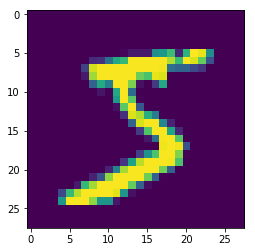

In [0]:
import numpy as np
import matplotlib.pyplot as plt

trainX = mat['trainX']
testX = mat['testX']
trainX = np.array(trainX, dtype=np.float)
testX = np.array(testX, dtype=np.float)

trainy = mat['trainY']
testy = mat['testY']



test = 657
one_digit = trainX[0, :]
y = trainy[:, 46]
digit_image = np.reshape(one_digit, (28,28))

plt.figure()
plt.imshow(digit_image)
trainy[0,0]

In [0]:
# X is data points, y is predicted points
def euclidean(x, y):
  return np.sqrt(np.sum((x-y) ** 2))

def cosine(x, y):
  return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))



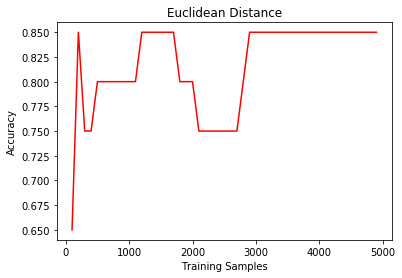

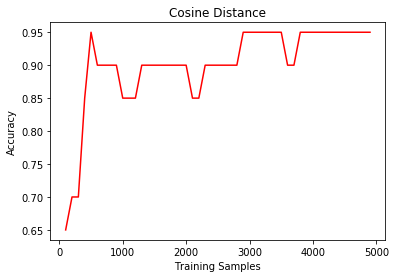

In [0]:

#FIXED TESTING 

plotX = []
plotY = []
cos_plotX = []
cos_plotY = []
# shuffle = np.random.permutation(np.shape(trainX)[0])
# trainX = trainX[shuffle]
# trainy = trainy[:, shuffle]

# shuffle_test = np.random.permutation(np.shape(testX)[0])
# testX = trainX[shuffle]
# testy = trainy[:, shuffle]

fixed_test = 20
confusion = np.zeros((10,10))

for i in range(100, 5000, 100):
  correct = 0
  cos_correct = 0
  for test_index in range(fixed_test):
    distances = []
    cosine_distances =[]
    for train_index in range(i):

      distances.append(euclidean(trainX[train_index, :], testX[test_index, :]))
      cosine_distances.append(cosine(trainX[train_index, :], testX[test_index, :]))
      
    distances = np.array(distances)
    cosine_distances = np.array(cosine_distances)
    min_index = np.argmin(distances)
    max_index = np.argmax(cosine_distances)

    if(trainy[0, min_index] == testy[0, test_index]):
      correct += 1
    else:
      confusion[trainy[0, min_index], testy[0, test_index]] += 1
    if(trainy[0, max_index] == testy[0, test_index]):
      cos_correct += 1
      
  accuracy = correct/fixed_test
  plotX.append(i)
  plotY.append(accuracy)
  cos_plotX.append(i)
  cos_plotY.append(cos_correct/fixed_test)
#  print(correct)

plt.figure()
plt.title('Euclidean Distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.plot(plotX, plotY, 'r-')
plt.savefig('Euc_fixed_test.jpg')
plt.figure()
plt.title('Cosine Distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.plot(cos_plotX, cos_plotY, 'r-')
plt.savefig('Cos_fixed_test.jpg')
conf_orig = confusion
conf_norm = np.array([])
for i in range (10):
  conf_norm = np.append(conf_norm, [(confusion[i,x]/np.sum(confusion)) for x in range(10)])

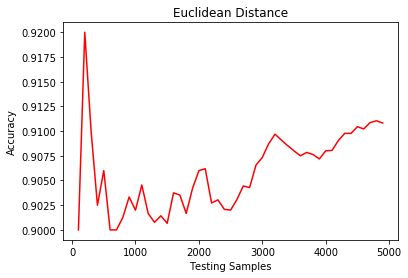

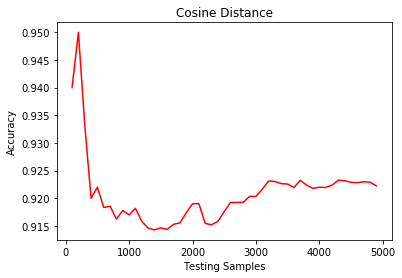

In [0]:
#Fixed Training set

plotX = []
plotY = []
cos_plotX = []
cos_plotY = []

fixed_train = 500

for i in range(100, 5000, 100):
  correct = 0
  cos_correct = 0
  for test_i in range(i):
    distances = [euclidean(trainX[tx, :], testX[test_i, :]) for tx in range(fixed_train)]
    cosine_distances =[cosine(trainX[tx, :], testX[test_i, :]) for tx in range(fixed_train)]
          
    distances = np.array(distances)
    cosine_distances = np.array(cosine_distances)
    
    min_index = np.argmin(distances)
    max_index = np.argmax(cosine_distances)

    if(trainy[0, min_index] == testy[0, test_i]):
      correct += 1
    if(trainy[0, max_index] == testy[0, test_i]):
      cos_correct += 1
      
  accuracy = correct/i
  plotX.append(i)
  plotY.append(accuracy)
  cos_plotX.append(i)
  cos_plotY.append(cos_correct/i)

plt.figure()
plt.title('Euclidean Distance')
plt.xlabel('Testing Samples')
plt.ylabel('Accuracy')
plt.plot(plotX, plotY, 'r-')
plt.savefig('Euc_fixed_train.jpg')
plt.figure()
plt.title('Cosine Distance')
plt.xlabel('Testing Samples')
plt.ylabel('Accuracy')
plt.plot(cos_plotX, cos_plotY, 'r-')
plt.savefig('Cos_fixed_train.jpg')


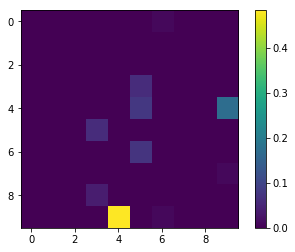

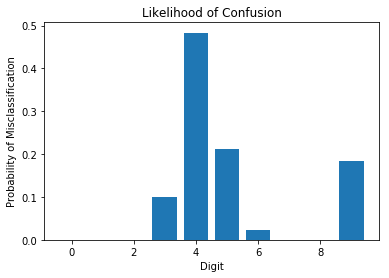

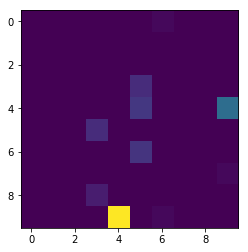

In [0]:
conf_norm = np.reshape(conf_norm, (10,10))
conf_hist = conf_norm.sum(axis=0)
# for i in range(np.shape(conf_norm)[0]):
#   conf_hist.append(np.sum(conf_norm[i]))
nums = [0,1,2,3,4,5,6,7,8,9]
plt.figure()
# plt.imshow((confusion))
plt.imshow(conf_norm)
plt.colorbar()
plt.savefig('confusion.jpg')
plt.figure()

plt.bar(nums, conf_hist)
plt.title('Likelihood of Confusion')
plt.xlabel('Digit')
plt.ylabel('Probability of Misclassification')
plt.savefig('probabilty_of_conf.jpg')
np.sum(conf_norm)
plt.figure()
plt.imshow(confusion)